In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory the data

In [34]:
train = pd.read_csv('train.csv')
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

<Axes: xlabel='Survived', ylabel='count'>

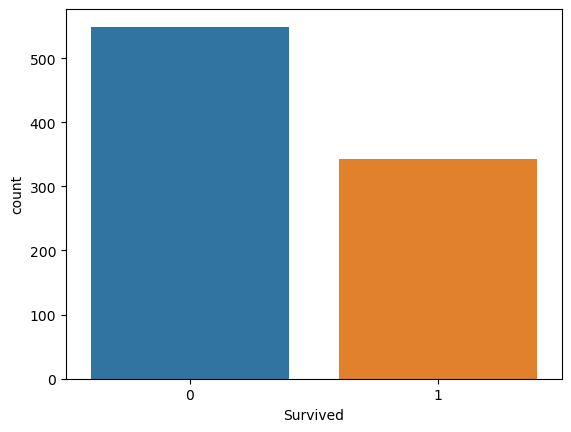

In [4]:
sns.countplot(x=train['Survived'],data =train)

<Axes: xlabel='Sex', ylabel='count'>

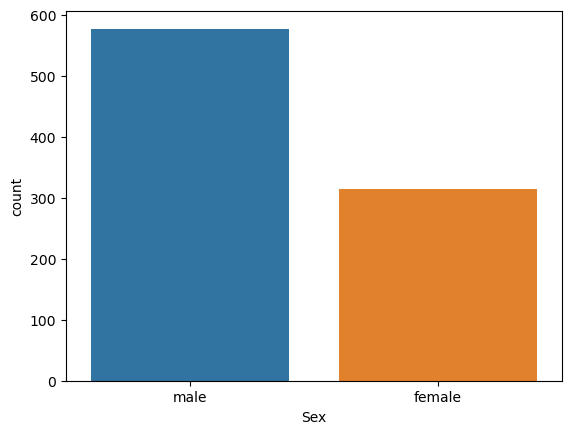

In [5]:
sns.countplot(x=train['Sex'],data =train)

<Axes: xlabel='Pclass', ylabel='count'>

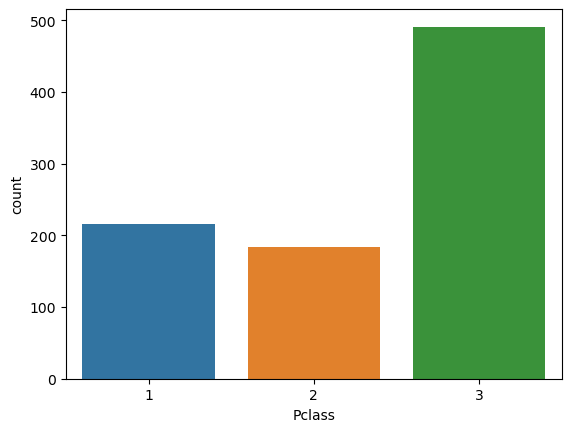

In [6]:
sns.countplot(x=train['Pclass'],data =train)

<Axes: xlabel='Embarked', ylabel='count'>

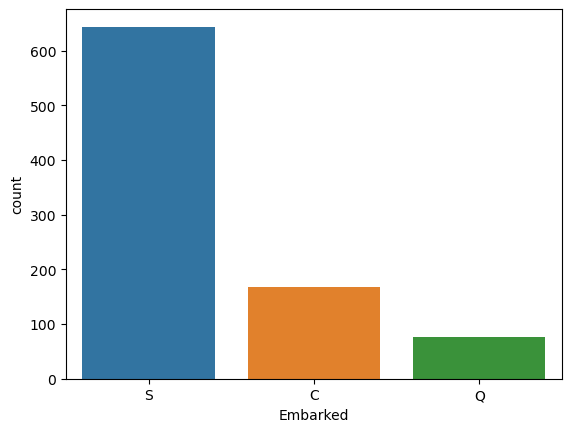

In [7]:
sns.countplot(x=train['Embarked'],data =train)

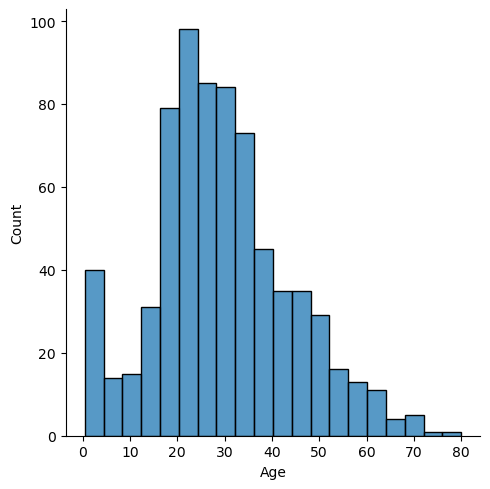

In [8]:
sns.displot(train['Age'])

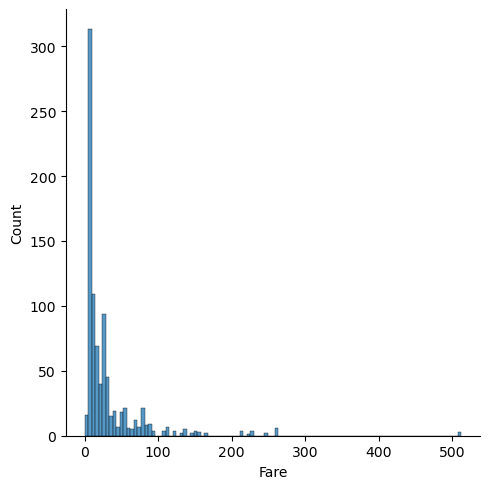

In [9]:
sns.displot(train['Fare'])

<Axes: xlabel='Pclass', ylabel='Fare'>

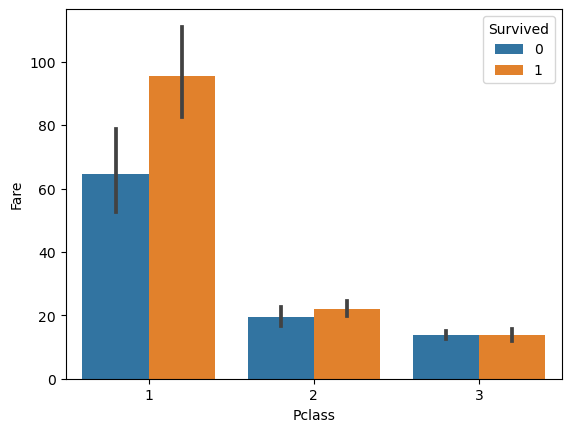

In [10]:
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

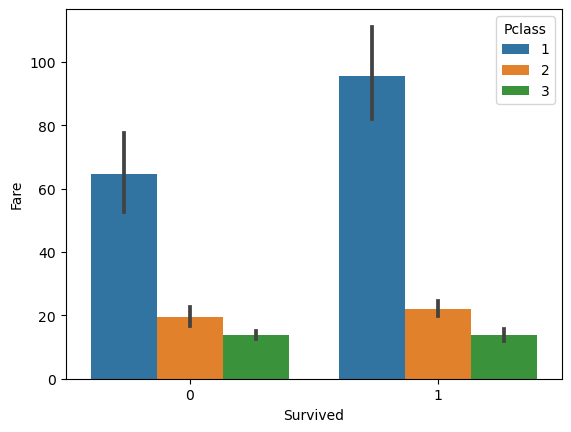

In [11]:
sns.barplot(data=train, x='Survived', y='Fare', hue='Pclass')

# Cleaning the data

In [35]:
#we clean the two dataframes in the same time
test = pd.read_csv('test.csv')
data = pd.concat([train,test],axis=0)
data = data.reset_index(drop=True)
data.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [36]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [37]:
data = data.drop(columns=['Cabin'],axis=1)

In [38]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [39]:
print(data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [40]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [41]:
data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [42]:
data = data.drop(['Name','Ticket'],axis= 1)

In [43]:
data.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1       0.0       3    0  22.0      1      0   7.2500         0
1            2       1.0       1    1  38.0      1      0  71.2833         1
2            3       1.0       3    1  26.0      0      0   7.9250         0
3            4       1.0       1    1  35.0      1      0  53.1000         0
4            5       0.0       3    0  35.0      0      0   8.0500         0

# Train -Test

In [44]:
train = data.iloc[:len(train),:]
test = data.iloc[len(train):,:]

In [60]:
x = train.drop(columns=['PassengerId','Survived'],axis=1)
y = train['Survived']

In [46]:
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model.fit(x_train, y_train)
print('Accuracy:', model.score(x_test, y_test))
score = cross_val_score(model, x, y, cv=5)
print('CV Score:', np.mean(score))

Accuracy: 0.8059701492537313
CV Score: 0.7945954428472789


In [48]:
model = LogisticRegression(C=0.0062505519252739694, max_iter=5000, 
            penalty='l2',solver='saga')

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model.fit(x_train, y_train)
print('Accuracy:', model.score(x_test, y_test))
score = cross_val_score(model, x, y, cv=5)
print('CV Score:', np.mean(score))

Accuracy: 0.6977611940298507
CV Score: 0.7138786014688344


In [50]:
model = LogisticRegression(C=0.1, penalty='l2', solver='saga', max_iter=90000)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model.fit(x_train, y_train)
print('Accuracy:', model.score(x_test, y_test))
score = cross_val_score(model, x, y, cv=5)
print('CV Score:', np.mean(score))

Accuracy: 0.8059701492537313
CV Score: 0.8002510827945516


In [58]:
X_test = test.drop(columns=['PassengerId', 'Survived'], axis=1)
X_test.head()

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
891       3    0  34.5      0      0   7.8292         2
892       3    1  47.0      1      0   7.0000         0
893       2    0  62.0      0      0   9.6875         2
894       3    0  27.0      0      0   8.6625         0
895       3    1  22.0      1      1  12.2875         0

In [52]:
prediction = model.predict(X_test)
prediction

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [53]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
hyperpara = [
   { 'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag','saga'],
    'max_iter': [100, 1000, 4500,90000]}
]

grid_search = GridSearchCV(clf,hyperpara,cv= 3, scoring="accuracy",return_train_score=True)
grid_search.fit(x_train,y_train)

C:\Users\smils\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smils\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smils\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smils\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

C:\Users\smils\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smils\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smils\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smils\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smils\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smils\anaconda3\envs\py38_1\lib\site-pack

C:\Users\smils\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smils\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smils\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smils\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smils\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smils\anaconda3\envs\py38_1\lib\site-pack

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 1, 10],
                          'max_iter': [100, 1000, 4500, 90000],
                          'penalty': ['l1', 'l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             return_train_score=True, scoring='accuracy')

In [54]:
final_clf = grid_search.best_estimator_
final_clf

LogisticRegression(C=10, max_iter=90000, solver='sag')

In [62]:
final_clf.score(x_test,y_test)

0.8059701492537313

# Result

In [66]:
X_final = train.drop(['Survived'],axis = 1)
y_finale = train['Survived']


In [67]:
prod_clf = LogisticRegression()
hyperpara = [
   { 'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag','saga'],
    'max_iter': [100, 1000, 4500,90000]}
]

grid_search = GridSearchCV(prod_clf,hyperpara,cv= 3, scoring="accuracy",return_train_score=True)
grid_search.fit(X_final,y_finale)

C:\Users\smils\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smils\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smils\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smils\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

C:\Users\smils\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smils\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smils\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smils\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smils\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smils\anaconda3\envs\py38_1\lib\site-pack

C:\Users\smils\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smils\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smils\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smils\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smils\anaconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\smils\anaconda3\envs\py38_1\lib\site-pack

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 1, 10],
                          'max_iter': [100, 1000, 4500, 90000],
                          'penalty': ['l1', 'l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             return_train_score=True, scoring='accuracy')

In [69]:
prod_clf = grid_search.best_estimator_

In [70]:
prod_clf

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [73]:
X_test = test.drop(columns=['PassengerId', 'Survived'], axis=1)
X_test.head()

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
891       3    0  34.5      0      0   7.8292         2
892       3    1  47.0      1      0   7.0000         0
893       2    0  62.0      0      0   9.6875         2
894       3    0  27.0      0      0   8.6625         0
895       3    1  22.0      1      1  12.2875         0

In [74]:
prediction = model.predict(X_test)
prediction

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [76]:
final_df=pd.DataFrame(test['PassengerId'])
final_df['Survived'] = prediction
final_df.to_csv("prediction.csv",index= False)

In [77]:
final_df

PassengerId  Survived
891           892       0.0
892           893       0.0
893           894       0.0
894           895       0.0
895           896       1.0
...           ...       ...
1304         1305       0.0
1305         1306       1.0
1306         1307       0.0
1307         1308       0.0
1308         1309       0.0

[418 rows x 2 columns]

In [78]:
gd = pd.read_csv('gender_submission.csv')

In [79]:
gd

PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

THE END 